The modules used here enable numerical integration of the Hodgkin-Huxley equations. The `HH.getting_started()` function shows a first example

In [ ]:
!pip install brian2
!pip install neurodynex3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 75 kB 2.3 MB/s 
     |████████████████████████████████| 154 kB 19.8 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 68.9 MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp37-cp37m-linux_x86_64.whl size=1283971 sha256=65a9c975bb9c59eb7a06a0fe9db5dafea58ddd6b1aff3a0bf1a2ef00d6196eac
  Stored in directory: /root/.cache/pip/wheels/59/ac/59/705b1babcd0bee25cc7e56c5616ed85dbd7afab2942e8b18cd
Successfully built brian2
  Attempting uninstall: brian2
    Found existing installation: Brian2 2.5.1
    Uninstalling Brian2-2.5.1:
      Successfully uninstalled Brian2-2.5.1


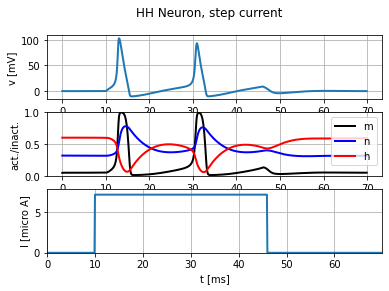

In [ ]:
%matplotlib inline  
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

HH.getting_started()

# Hodgkin-Huxley Model Differential Equation
$ C \frac{du}{dt} = I_{stim} + g_{Na}*m^3*h*(E_{Na}-vm) + g_{leak}*(E_l-vm) + g_K*n^4*(E_K-vm) $

In [ ]:
?HH.simulate_HH_neuron

In [ ]:
?HH.plot_data

In [ ]:
?input_factory

### Question 1 step current response
See [Question 6.1](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html#exercise-step-current-response)

a) What is the minimum input current to generate a single spike?

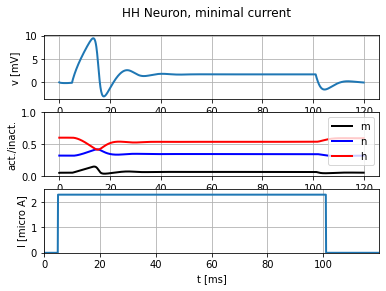

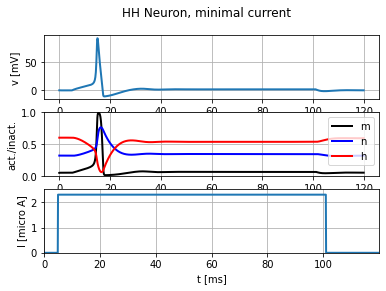

In [ ]:
for i in [2.29,2.3]:
  I_min = i # this value is insufficient
  current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
  state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
  HH.plot_data(state_monitor, title="HH Neuron, minimal current")

**Therefore we see that the minimum current for a single spike is 2.3$\mu$A**

b) What is the minimum input threshold to see *repeated* firing?, why is it different?

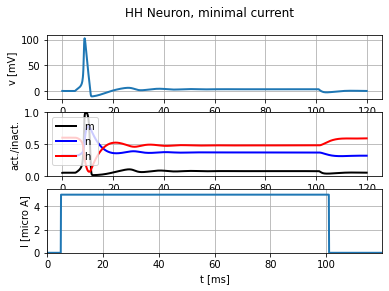

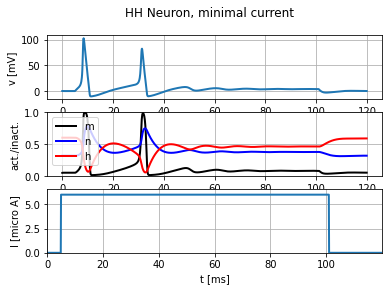

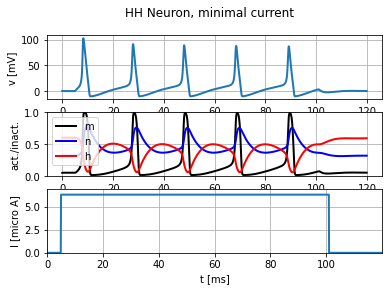

In [ ]:
for i in [5,6,6.3]:
  I_min = i 
  current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
  state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
  HH.plot_data(state_monitor, title="HH Neuron, minimal current")

From the previous simulation we see three different regimes: 
- From $5\mu A$ to $6\mu A$ we get a single spike
- From $6\mu A$ to $6.3\mu A$ we get a two spikes
- From $6.3\mu A$ onwards we get a repeated spiking pattern


### Question 2 slow and fast ramp current
see [Exercise 6.2](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html#exercise-slow-and-fast-ramp-current)

The previous exercise already suggests that firing in the HH model depends on the history of the model. 
Here we  show this again by having an input current slowing rmaping up from 0 to a maximum value. How fast the ramp goes makes all the difference. Why?

voltage_slow=6.48 mV


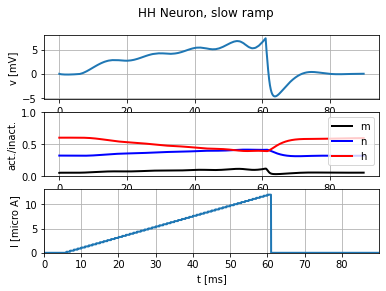

voltage_fast=6.54 mV


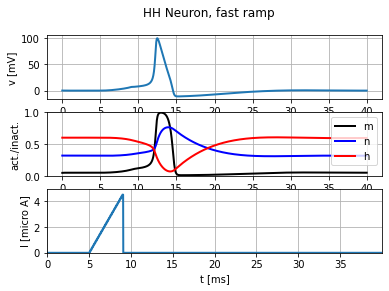

In [ ]:
## SLOW RAMP

b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 60  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt)) # index of time at current cessation
voltage_slow = state_monitor.vm[0,idx_t_end] # voltage at end of current input
print("voltage_slow={:.2f} mV".format(voltage_slow*1000))
HH.plot_data(state_monitor, title="HH Neuron, slow ramp")

## FAST RAMP

b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 90  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt)) # index of time at current cessation
voltage_fast = state_monitor.vm[0,idx_t_end] # voltage at end of current input
print("voltage_fast={:.2f} mV".format(voltage_fast*1000))
HH.plot_data(state_monitor, title="HH Neuron, fast ramp")

For the slow ramp, the neuron does not even spike, whereas the ramp goes up to an even higher current than for the fast ramp.

For the fast ramp we see that the current even finishes some time before the actual spike, but nonetheless the neuron spikes.

This clearly demonstrates the fact that the state of the neuron and its spiking is influenced by the past state of the neuron.

## Question 3
see [Exercise 6.4](http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html#exercise-brian-implementation-of-a-hh-neuron) 

Here, we will modify the parameters in the implementation of the HH model (from the default values, computed for the giant squid axon. 
Here below, the code from the `simulate_HH_neuron` function is reproduced, so that you can change it. The function has been renamed to `my_simulate_HH_neuron` to avoid confusion. 
Try changing the paratemeters in there. For reference, the default values are:

```python
# neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad
```

Try for example changing the Sodium conductance gNa, and try to apply current steps as above: what happens?

NOTE: you have to re-execute the cell below each time you change the paratemeters for changes to take effect!

In [ ]:
def my_simulate_HH_neuron(input_current, simulation_time, Na_cond_factor, K_cond_factor):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

    # NEW NEURON PARAMETERS; override the previous ones
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = K_cond_factor * 36 * b2.msiemens
    gNa = Na_cond_factor * 120 * b2.msiemens 
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


## 5.4.1

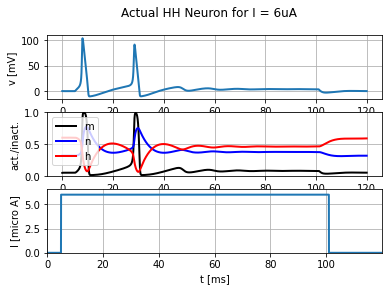

WARNING    "i" is an internal variable of group "neurongroup", but also exists in the run namespace with the value 6.3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


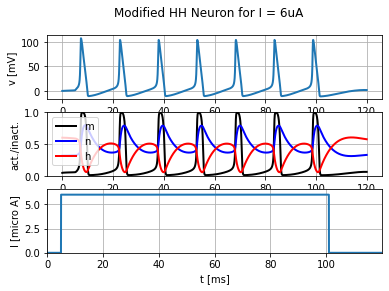

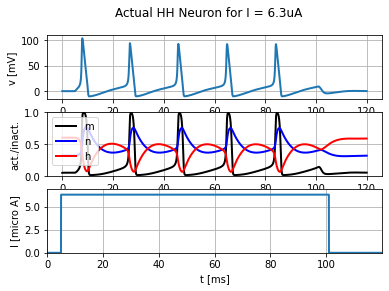

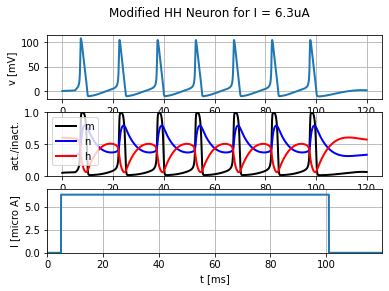

In [ ]:
for current_val in [6,6.3]:
  I_min = current_val
  current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)

  state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
  HH.plot_data(state_monitor, title="Actual HH Neuron for I = {}uA".format(current_val))

  state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms, 1.4, 1)
  HH.plot_data(state_monitor, title="Modified HH Neuron for I = {}uA".format(current_val))

Here we compare the modelling of the standard HH neuron and a modified HH neuron, with the same current input, but increased Na+ conductance times 1.4 in the modified HH neuron.

For increasing the conductance of Na+ channels, we clearly see an increase in the amount of spiking, as intuitively makes sense; the opening of Na+ channels initializes the depolarization of the membrane potential. Increasing the conductance of the Na+ therefore should translate to faster depolarization, and so faster spiking.

WARNING    "i" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value 6.3. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


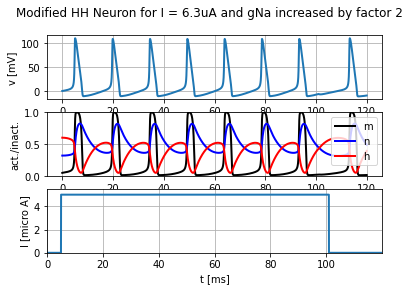

In [ ]:
I_min = 5 
gNa_factor = 2
gK_factor = 1
current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)

state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms, gNa_factor, gK_factor)
HH.plot_data(state_monitor, title="Modified HH Neuron for I = {}uA and gNa increased by factor {}".format(current_val,gNa_factor))

## 5.4.2

"Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation."


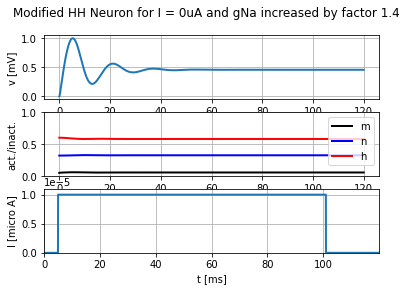

0.45983746 * mvolt

In [ ]:
I_val = 0.00001
gNa_factor = 1.4 # multiply original conductance values by factor
gK_factor = 1 
current = input_factory.get_step_current(5, 100, b2.ms, I_val *b2.uA)

state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms, gNa_factor, gK_factor)
HH.plot_data(state_monitor, title="Modified HH Neuron for I = {}uA and gNa increased by factor {}".format(0,gNa_factor))

rest_potential = state_monitor.vm[0][-100]
rest_potential

### Link to GHK equation:


- Wrong:

   The GHK voltage equation is given by an equivalent formulation:
  $ V_m = \frac{(E_{Na}*g_{Na}) + (E_K *g_K)}{g_{Na}+g_K}$ 

  (source: https://www.sas.upenn.edu/LabManuals/BBB251/NIA/NEUROLAB/PATCH/rpans7.htm )

  The values are given by 

      El = 10.6 * b2.mV
      EK = -12 * b2.mV
      ENa = 115 * b2.mV
      gl = 0.3 * b2.msiemens
       gK = K_cond_factor * 36 * b2.msiemens
      gNa = Na_cond_factor * 120 * b2.msiemens 
       C = 1 * b2.ufarad
      V_m = ((ENa*gNa)+EK*gK)/(gNa+gK)

  Giving us $ V_m = 92.6 mV$, which is of course wrong. 

- **Right**: 

  The Goldman-Hodgkin-Katz voltage equation is given by

  $V_m = \frac{R*T}{F}  ln\frac{P_k [K^+]_o + P_{Na} [Na^+]_o}{P_k [K^+]_i + P_{Na} [Na^+]_i} $

  If we increase the sodium conductance, naturally there will be more Na+ ions on the outside of the membrane, thus increasing the resting potential of the  membrane.

## 5.4.3

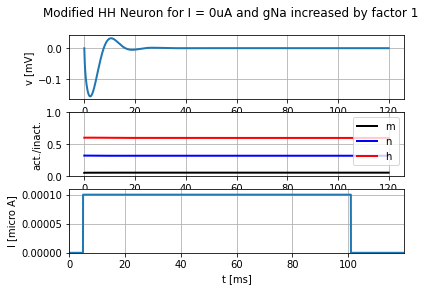

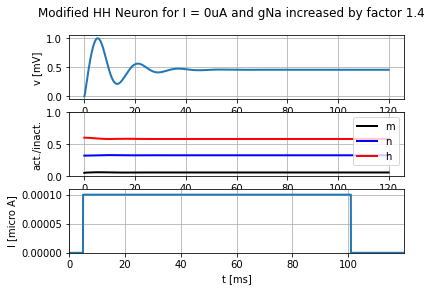

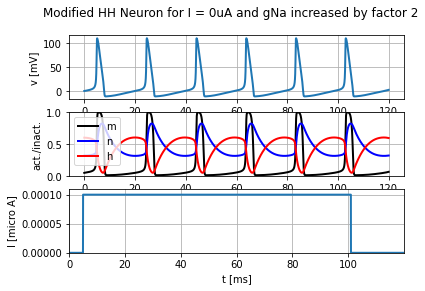

In [ ]:
Na_factors = [1,1.4,2]
I_val = 0.0001 # setting to 0 gives a error message 
for Na_factors in Na_factors:
  gNa_factor = Na_factors
  gK_factor = 1
  current = input_factory.get_step_current(5, 100, b2.ms, I_val *b2.uA)

  state_monitor = my_simulate_HH_neuron(current, 120 * b2.ms, gNa_factor, gK_factor)
  HH.plot_data(state_monitor, title="Modified HH Neuron for I = {}uA and gNa increased by factor {}".format(0,gNa_factor))

Here we experiment with changing the Na+ conductance even further, and setting the input current to 0. 

It is observed that the increased conductance facilitates spiking of the HH neuron, *even in the absence of an input current!* 